In [42]:
import numpy as np # linear algebra
import pandas as pd

In [43]:
df = pd.read_csv('C:/Users/nishi/Documents/data science/SDP/imdb_sup.csv')
df

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1
...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0
49997,Just listen to the Broadway cast album and to ...,3,0
49998,I have been a fan of the Carpenters for a long...,3,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     50000 non-null  object
 1   Rating     50000 non-null  int64 
 2   Sentiment  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [45]:
print("Shape of the dataset: ", df.shape)
print(df.isnull().sum())

Shape of the dataset:  (50000, 3)
Review       0
Rating       0
Sentiment    0
dtype: int64


In [46]:
df.dropna(subset=['Review'], inplace = True)

In [47]:
df.isnull().any()

Review       False
Rating       False
Sentiment    False
dtype: bool

In [48]:
df = df.drop_duplicates()

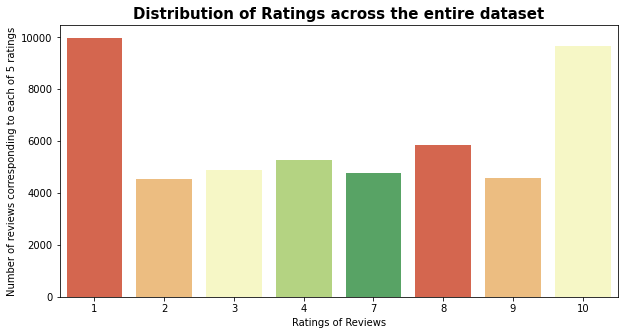

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df['Rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show()

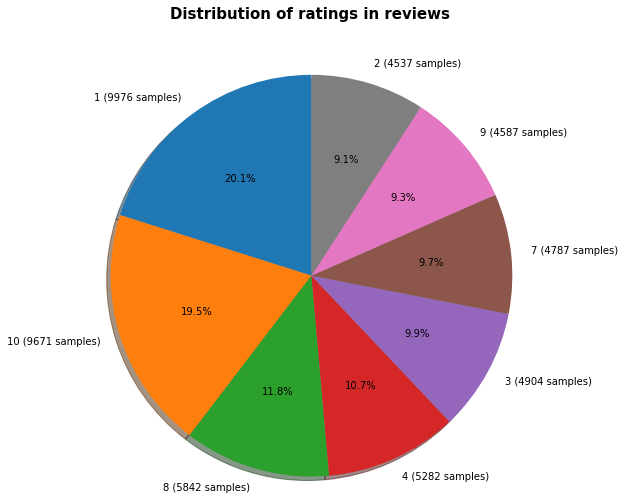

In [50]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Rating"].value_counts()[k]} samples)' for k in df['Rating'].value_counts().keys()]
sizes = dict(df['Rating'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of ratings in reviews",pad=40, fontweight='bold', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='count'>

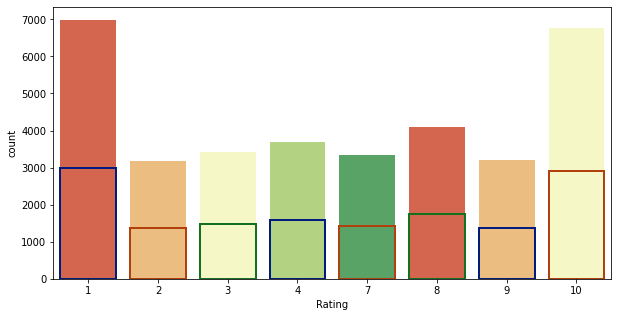

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.30, random_state=1, stratify=df['Rating'])
plt.figure(figsize=(10,5))
sns.countplot(y_train, palette=sns.color_palette("RdYlGn", 5), alpha = 1)
sns.countplot(y_test,facecolor=(0, 0, 0, 0), linewidth=2, edgecolor=sns.color_palette("dark", 3))

In [52]:
#Concatenating the training instances (reviews and target Variable)
X_train_df = pd.concat([X_train, y_train], axis = 1)
X_train_df = X_train_df.reset_index(drop=True)

In [53]:
# a temporary dataframe to show how the data is getting processed after every step
post_this_step = pd.DataFrame(columns=['Review'])
post_this_step['Review'] = X_train_df["Review"][5000:5010]

In [54]:
import nltk
import re

In [55]:
import contractions

In [56]:
def expandContractions(text):
    expandedText = contractions.fix(text)
    return expandedText

X_train_df['Review'] = X_train_df['Review'].apply(expandContractions)

In [57]:
# after applying expansion
post_this_step['Expanded Reviews'] = X_train_df["Review"][5000:5010]
post_this_step

,Review,Expanded Reviews
5000,As a Sci-fi movies fan I also like Alien. But ...,As a Sci-fi movies fan I also like Alien. But ...
5001,This indie film is worth a look because of the...,This indie film is worth a look because of the...
5002,This film has a rotting core of flexible moral...,This film has a rotting core of flexible moral...
5003,"Okay, so the introduction, with its hokey offe...","Okay, so the introduction, with its hokey offe..."
5004,Don't let the wildly varying reviews of the mo...,Do not let the wildly varying reviews of the m...
5005,Inspector Gadget was probably my all-time favo...,Inspector Gadget was probably my all-time favo...
5006,Let me be clear. I've used IMDb for years. But...,Let me be clear. I have used IMDb for years. B...
5007,"Perhaps it's me and my perverted ways, or the ...","Perhaps it is me and my perverted ways, or the..."
5008,"I've seen a few bad action movies in my days, ...",I have seen a few bad action movies in my days...
5009,I unknowingly had this movie on my shelf for a...,I unknowingly had this movie on my shelf for a...


In [58]:
from nltk.tokenize import RegexpTokenizer

# based on the study of this dataset, we can ignore :), ;( 
def tokenization(text):
        tokenizer = RegexpTokenizer("[a-zA-Z]+", discard_empty=True)
        text = tokenizer.tokenize(text)
        text = " ".join(text)
        return text.lower()
    
# applying tokenization along with punctuation removal and lowercasing
X_train_df['Review'] = X_train_df['Review'].apply(lambda doc: tokenization(doc))

In [59]:
#after applying tokenization 
post_this_step['Tokenized Reviews'] = X_train_df["Review"][5000:5010]
post_this_step

,Review,Expanded Reviews,Tokenized Reviews
5000,As a Sci-fi movies fan I also like Alien. But ...,As a Sci-fi movies fan I also like Alien. But ...,as a sci fi movies fan i also like alien but p...
5001,This indie film is worth a look because of the...,This indie film is worth a look because of the...,this indie film is worth a look because of the...
5002,This film has a rotting core of flexible moral...,This film has a rotting core of flexible moral...,this film has a rotting core of flexible moral...
5003,"Okay, so the introduction, with its hokey offe...","Okay, so the introduction, with its hokey offe...",okay so the introduction with its hokey offer ...
5004,Don't let the wildly varying reviews of the mo...,Do not let the wildly varying reviews of the m...,do not let the wildly varying reviews of the m...
5005,Inspector Gadget was probably my all-time favo...,Inspector Gadget was probably my all-time favo...,inspector gadget was probably my all time favo...
5006,Let me be clear. I've used IMDb for years. But...,Let me be clear. I have used IMDb for years. B...,let me be clear i have used imdb for years but...
5007,"Perhaps it's me and my perverted ways, or the ...","Perhaps it is me and my perverted ways, or the...",perhaps it is me and my perverted ways or the ...
5008,"I've seen a few bad action movies in my days, ...",I have seen a few bad action movies in my days...,i have seen a few bad action movies in my days...
5009,I unknowingly had this movie on my shelf for a...,I unknowingly had this movie on my shelf for a...,i unknowingly had this movie on my shelf for a...


In [60]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [25]:
stop_words= ['yourself','yourselves','herself', 'itself', 'themselves', 'himself', 'ourselves',
             'myself', 'between', 'whom', 'is', "she", 'up', 'here', 'your', 'each', 'we', 'he',
             'my', 'you', 'having', 'in', 'both', 'for', 'are', 'them', 'other','and', 'an', 
             'during', 'their', 'can', 'she', 'until', 'so', 'these', 'ours', 'above', 'what', 
             'while', 'have', 'more', 'only', 'when', 'just', 'that', 'were',
             'should', 'any', 'who',  'a', 'they', 'to', 'has', 'before',
             'into', 'yours', "it", 'do', 'on',  'now', 'her', 'by', 'an', 'from', 
             'about', 'further', "would", 'as', 'how', 'been', 'the', 'or', 
             'doing', 'such','his',  'was', 'through', 'out', 'below', 'own', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'same', 'some', 'with',
             'it','at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 
             'did', 'of', 'had', 'under', 'over','again', 'where', 'those', 'then', 'i',
             'because', 'does', 'all', 'will', 'shall', 's','t','n','d', 'e','u', 'x','am','get','phone']

In [26]:
stop_words = sorted(set(stop_words))
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'during', 'e', 'each', 'for', 'from', 'further', 'get', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'me', 'more', 'my', 'myself', 'n', 'now', 'of', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'phone', 's', 'same', 'shall', 'she', 'should', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'u', 'under', 'until', 'up', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'would', 'x', 'you', 'your', 'yours', 'yourself', 'yourselves']


In [61]:
# function to filter out stopwords
def removeStopwords(text):
    updatedtext = []
    for word in text.split():
        if(word not in stopwords.words('english')):
            updatedtext.append(word)
            
    return " ".join(updatedtext)

# removing stopwords from the Reviews attribute
X_train_df['Review'] = X_train_df['Review'].apply(lambda doc: removeStopwords(doc))

In [62]:
post_this_step.drop(['Expanded Reviews'], axis = 1, inplace = True)
post_this_step['Stopwords Removed Reviews'] = X_train_df["Review"][5000:5010]
post_this_step

,Review,Tokenized Reviews,Stopwords Removed Reviews
5000,As a Sci-fi movies fan I also like Alien. But ...,as a sci fi movies fan i also like alien but p...,sci fi movies fan also like alien pitch black ...
5001,This indie film is worth a look because of the...,this indie film is worth a look because of the...,indie film worth look enormous talent creators...
5002,This film has a rotting core of flexible moral...,this film has a rotting core of flexible moral...,film rotting core flexible morality yet quirky...
5003,"Okay, so the introduction, with its hokey offe...",okay so the introduction with its hokey offer ...,okay introduction hokey offer free coffin anyo...
5004,Don't let the wildly varying reviews of the mo...,do not let the wildly varying reviews of the m...,let wildly varying reviews movie deter love ha...
5005,Inspector Gadget was probably my all-time favo...,inspector gadget was probably my all time favo...,inspector gadget probably time favorite cartoo...
5006,Let me be clear. I've used IMDb for years. But...,let me be clear i have used imdb for years but...,let clear used imdb years today went trouble r...
5007,"Perhaps it's me and my perverted ways, or the ...",perhaps it is me and my perverted ways or the ...,perhaps perverted ways fact tend sick mind ren...
5008,"I've seen a few bad action movies in my days, ...",i have seen a few bad action movies in my days...,seen bad action movies days one plain awful fe...
5009,I unknowingly had this movie on my shelf for a...,i unknowingly had this movie on my shelf for a...,unknowingly movie shelf mill creek collection ...


In [63]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatizeText(text):
    lemmatizedList = []
    lemmatizer = WordNetLemmatizer()
    for word in text.split():
        lem_word = lemmatizer.lemmatize(word)
        lemmatizedList.append(lem_word)
    return " ".join(lemmatizedList)

X_train_df['Review'] = X_train_df['Review'].apply(lemmatizeText)

In [66]:
post_this_step.drop(['Tokenized Reviews'], axis = 1, inplace = True)
post_this_step['Lemmatized Reviews'] = X_train_df["Review"][5000:5010]
post_this_step

,Review,Stopwords Removed Reviews,Lemmatized Reviews
5000,As a Sci-fi movies fan I also like Alien. But ...,sci fi movies fan also like alien pitch black ...,sci fi movie fan also like alien pitch black d...
5001,This indie film is worth a look because of the...,indie film worth look enormous talent creators...,indie film worth look enormous talent creator ...
5002,This film has a rotting core of flexible moral...,film rotting core flexible morality yet quirky...,film rotting core flexible morality yet quirky...
5003,"Okay, so the introduction, with its hokey offe...",okay introduction hokey offer free coffin anyo...,okay introduction hokey offer free coffin anyo...
5004,Don't let the wildly varying reviews of the mo...,let wildly varying reviews movie deter love ha...,let wildly varying review movie deter love hat...
5005,Inspector Gadget was probably my all-time favo...,inspector gadget probably time favorite cartoo...,inspector gadget probably time favorite cartoo...
5006,Let me be clear. I've used IMDb for years. But...,let clear used imdb years today went trouble r...,let clear used imdb year today went trouble re...
5007,"Perhaps it's me and my perverted ways, or the ...",perhaps perverted ways fact tend sick mind ren...,perhaps perverted way fact tend sick mind rent...
5008,"I've seen a few bad action movies in my days, ...",seen bad action movies days one plain awful fe...,seen bad action movie day one plain awful feel...
5009,I unknowingly had this movie on my shelf for a...,unknowingly movie shelf mill creek collection ...,unknowingly movie shelf mill creek collection ...


In [67]:
# encapsulate all the pre-processing functions together
def preprocess_review(review):
    expanded_review = expandContractions(review)
    tokenized_review = tokenization(expanded_review)
    removed_stopwords_review = removeStopwords(tokenized_review)
    lemmatized_review = lemmatizeText(removed_stopwords_review)
    return lemmatized_review

In [68]:
# function to count characters in a list of strings
def getWordCount(text):
    word_count = 0
    for word in text.split():
        word_count += 1
    return word_count

def getReviewLength(text):
    review_length = 0
    for word in text.split():
        review_length += len(word)
    return review_length

In [69]:
X_train_df['review_length'] = np.array(X_train_df['Review'].apply(getReviewLength))
X_train_df['word_count'] = np.array(X_train_df['Review'].apply(getWordCount))

In [70]:
X_train_df.head(5)

,Review,Rating,review_length,word_count
0,fact cruddy series could elicit dozen comment ...,1,369,72
1,movie amazing several reason harris take extre...,10,804,123
2,surface cooley high snappy ensemble comedy mas...,8,587,109
3,surface one best show ever seen nbc stupid can...,10,314,66
4,everything great documentary could yeah one de...,1,504,84


In [71]:
X_train_df.review_length.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         369
1         804
2         587
3         314
4         504
         ... 
34705    1778
34706     471
34707     360
34708     695
34709     290
Name: review_length, Length: 34710, dtype: int64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


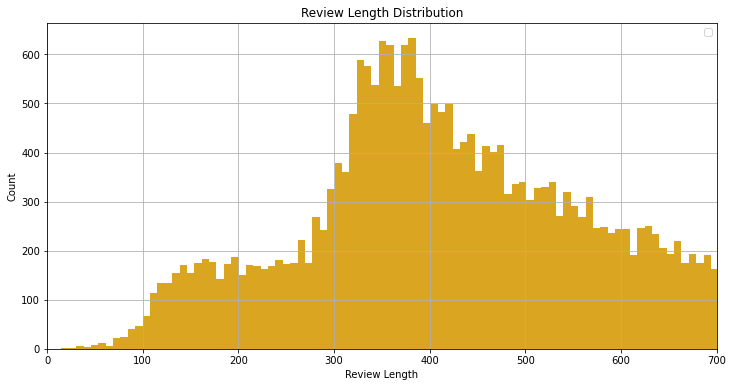

In [72]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 1000
plt.hist(X_train_df['review_length'], facecolor='goldenrod', alpha=1, bins=bins)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,700)
plt.grid(True)
plt.show()

In [75]:
print(len(X_train_df[X_train_df['review_length'] > 400])*100/len(X_train_df))

66.34111207144915


In [76]:
index_names = X_train_df[X_train_df['review_length'] > 400].index

In [77]:
X_train_df.drop(index_names, inplace = True)

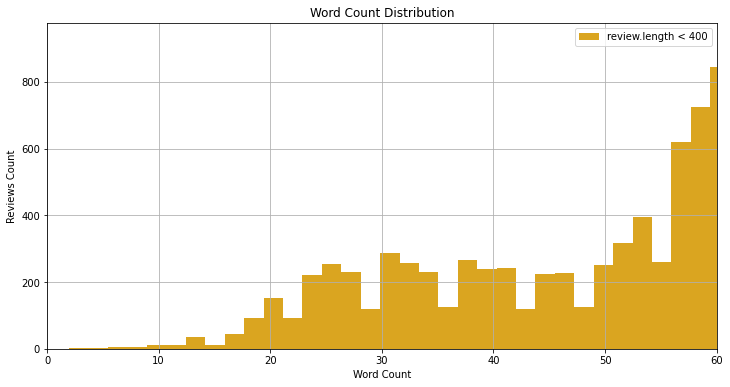

In [78]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.title('Word Count Distribution')
plt.hist(X_train_df['word_count'], bins=50,facecolor='goldenrod', label=['review.length < 400'])
plt.xlim(0,60)
plt.xlabel('Word Count')
plt.ylabel('Reviews Count')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [79]:
dfNegReviews = X_train_df[X_train_df["Rating"] < 3]
dfPosReviews = X_train_df[X_train_df["Rating"] > 3]

In [80]:
# importing the library
from wordcloud import WordCloud

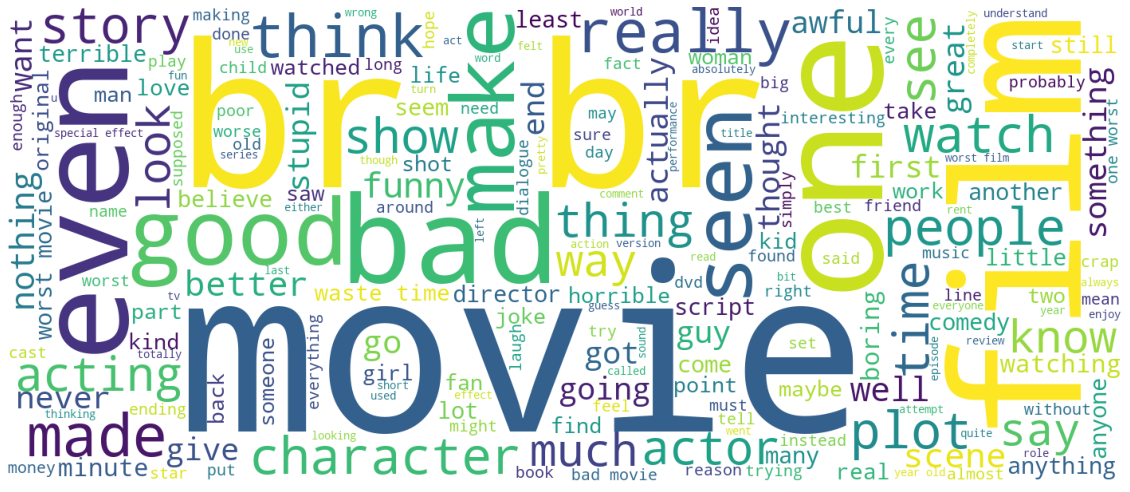

In [82]:
text = ""
for review in dfNegReviews['Review']:
    text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

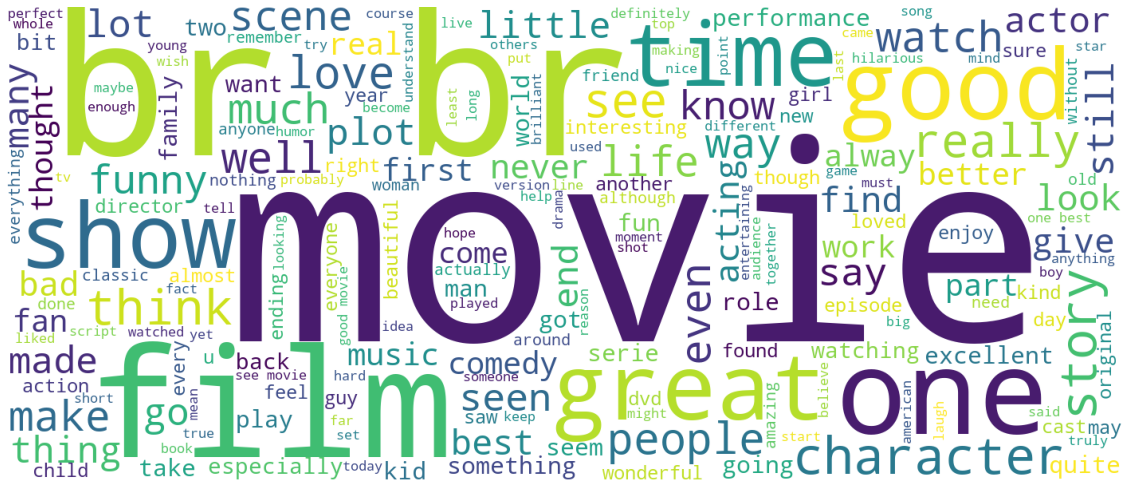

In [83]:
text = ""
for review in dfPosReviews['Review']:
        text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

In [84]:
# importing the libaries 
from nltk.util import ngrams
from collections import Counter

In [91]:
def generateNgrams(documents, size):
    '''
    Input: 
    documents: dataframe having only reviews stacked
    size: size of ngram(as 1,2,3..)
    
    Output:
    dataframe:{columns = {'words','count'}}
    '''
    
    
    ngrams_all = []
    
    for document in documents:  # the document is not splitted already
         
        document = document.split()
        
        if len(document) < size:
            continue
        else:
            output = list(ngrams(document, size))

        for ngram in output:
            ngrams_all.append(" ".join(ngram))
            
    count_ngram = Counter()
    
    for word in ngrams_all:  # making word frequency dictionary
        count_ngram[word] += 1
        
    
    # converting from dictionary to dataframe data structure
    
    df = pd.DataFrame.from_dict(count_ngram, orient='index').reset_index()
    
    df = df.rename(columns={'index':'words', 0:'count'})
    
    df = df.sort_values(by='count', ascending=False) # highest freq words on the top
    
    df = df.head(25) # taking 20 most frequent n-grams
    df = df.sort_values(by='count')
    
    
    return df

In [92]:
def plotNgrams(documents):
    
    '''
    documents : dataframe attribute having reviews text or lists of reviews
    '''
    
    unigrams = generateNgrams(documents, 1)
    bigrams = generateNgrams(documents, 2)
    trigrams = generateNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)
    
    # plot 1
    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=1)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    # plot 2
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=1, color = 'red')
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    
    # plot 3
    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=1, color = 'green')
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

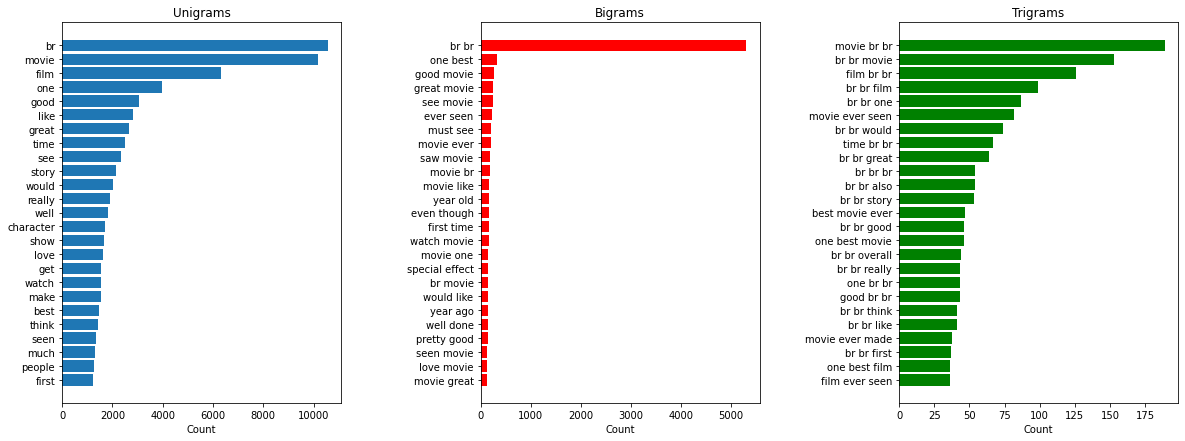

In [93]:
plotNgrams(dfPosReviews['Review'])

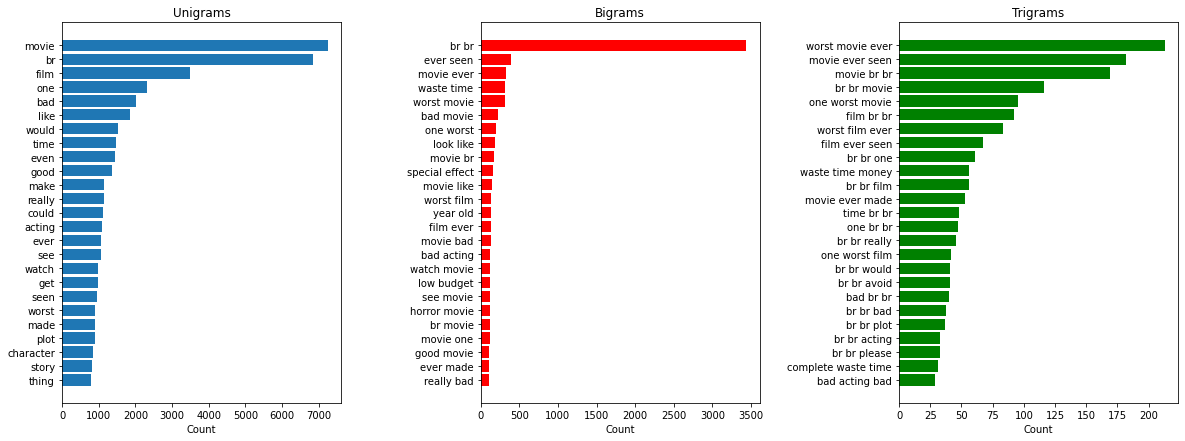

In [95]:
plotNgrams(dfNegReviews['Review'])

In [96]:
# importing library
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
documents = list(X_train_df['Review'])

In [99]:
vectorizer_uni = TfidfVectorizer(ngram_range=(1,1))
vectorized_uni = vectorizer_uni.fit_transform(documents)
X_unigram = vectorized_uni.toarray()

In [100]:
X_unigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
X_unigram.sum(axis=0)

array([0.40388343, 0.22213494, 0.23911089, ..., 0.26548344, 0.22684685,
       0.27195734])

In [102]:
print("The length of the feature vector is :",X_unigram.shape[1])

The length of the feature vector is : 30054


In [103]:
vectorizer_uni.get_feature_names()[20050:20075]

['playability',
 'playbook',
 'playboy',
 'played',
 'player',
 'playful',
 'playfully',
 'playfulness',
 'playground',
 'playhouse',
 'playing',
 'playmaker',
 'playmania',
 'playmate',
 'playoff',
 'playstation',
 'plaything',
 'playwright',
 'plaza',
 'plea',
 'plead',
 'pleading',
 'pleads',
 'pleae',
 'pleantly']

In [104]:
traindf = pd.DataFrame(X_train_df, columns =['Reviews', 'Rating'])
traindf.to_csv('SRPtrain.csv', index=False,header=True)

In [105]:
testdf = pd.concat([X_test, y_test], axis=1)
testdf.to_csv('SRPtest.csv')

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [107]:
y_train = X_train_df['Rating']

In [108]:
# Train the model
model = MultinomialNB()
model.fit(X_unigram,y_train)

MultinomialNB()

In [109]:
#make predictions using the trained model
y_pred = model.predict(X_unigram) 

In [110]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.4699991440554652
